In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from joblib import dump

In [11]:
raw_data_path = r"../data/raw/raw_dataset.csv"
# Read dataset
df = pd.read_csv(raw_data_path, sep=",")
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [12]:
# Drop irrelevant features 
L = ['Time','Wind gust (Km/h)','Wind speed (Km/h)', 'Pressure (KPa)','ph','rainfall','N','P','K','Air temperature (C)','Air humidity (%)']
df.drop(columns=L,axis=1,inplace=True)

In [13]:
df.head()

,Soil Moisture,Temperature,Soil Humidity,Status
0,54,22,70,ON
1,12,20,40,OFF
2,34,26,35,ON
3,7,44,44,OFF
4,50,38,23,OFF


In [4]:
#Set 'Status variable to binary
encoder = LabelBinarizer()
df['Status'] = encoder.fit_transform(df['Status'])

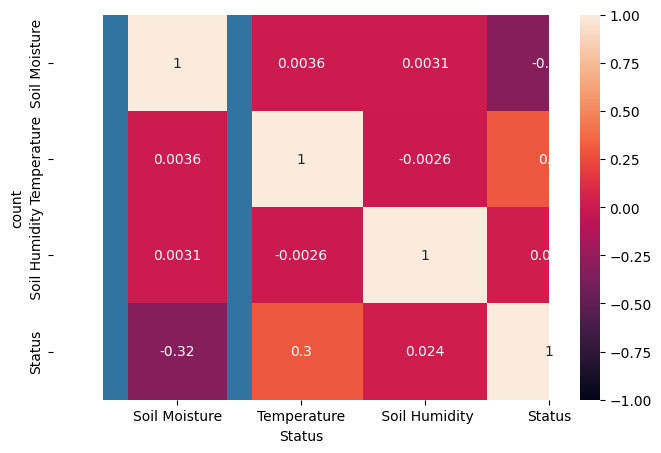

In [5]:
#Data vizualisation
plt.figure(figsize=(8, 5))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1)

ax = sns.countplot(x="Status",width= 0.2,data=df)
plt.show()



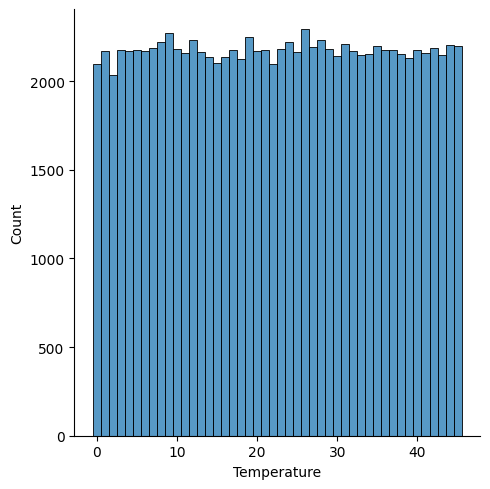

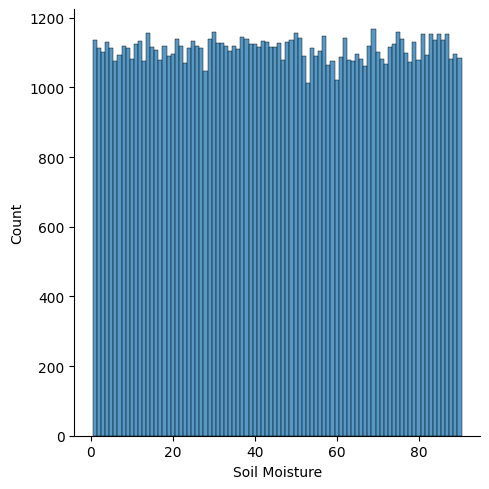

In [6]:
sns.displot(df, x="Temperature", binwidth=3, bins=20, discrete=True, height=5)
sns.displot(df, x="Soil Moisture", binwidth=3, bins=20, discrete=True, height=5)
plt.show()

In [7]:
#Split features and Target variable
X=df.drop(columns='Status',axis=1)
y=df['Status'].to_frame()

In [8]:
#Split features and Target variable
X=df.drop(columns='Status',axis=1)
y=df['Status'].to_frame()

#Scaling data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)

data=pd.concat([X,y],axis=1)
#Split train and test sets
train, test = train_test_split(data, test_size=0.3, stratify=data['Status'])

In [9]:
# Set path to the outputs
MODEL_DIR = "../model/"
PROCESSED_DATA_DIR = "../data/processed/"
train_path = PROCESSED_DATA_DIR + 'train.csv'
test_path = PROCESSED_DATA_DIR + 'test.csv'
scaler_path = MODEL_DIR + 'scaler.joblib'

dump(scaler, scaler_path)

['../model/scaler.joblib']

In [10]:
# Save csv
train.to_csv(train_path, index=False)
test.to_csv(test_path,  index=False)